<a href="https://colab.research.google.com/github/srinu-nayak/Real-Estate-House-Price-Prediction/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gurgaon_properties.csv to gurgaon_properties.csv
Saving gurgaon_properties_missing_value_imputation.csv to gurgaon_properties_missing_value_imputation (1).csv
Saving latlong.csv to latlong.csv


In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [6]:
latlong = pd.read_csv('latlong.csv')

In [7]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [8]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [9]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [10]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [11]:
new_df = df.merge(latlong, on='sector')

In [15]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [17]:
numeric_cols = ['price','price_per_sqft','built_up_area','latitude','longitude']
group_df = new_df.groupby('sector')[numeric_cols].mean()

group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [18]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [19]:
new_df.to_csv('data_viz1.csv',index=False)

In [20]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [21]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 95 Gurgaon,flat,ramprasta awho,0.92,5257.0,1750.0,Built Up area: 1750 (162.58 sq.m.)Carpet area:...,3,3,3+,not available,"Sector 95 Gurgaon, Gurgaon, Haryana",13.0,North-East,undefined,NaN,"3 bath, unfurnished, 13th floor (Of 26), overl...",NaN,NaN,"['Safety4.5 out of 5', 'Lifestyle4.5 out of 5'..."
1,3 BHK Flat in Sector 81 Gurgaon,flat,bestech park view grand spa,2.20,8270.0,2660.0,Super Built up area 2660(247.12 sq.m.)Carpet a...,3,4,3+,servant room,"Sector-81, Sector 81 Gurgaon, Gurgaon, Haryana",8.0,East,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, IMT Manesar', 'Dwa...",Bestech park view grand spa is one of the most...,"['4 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Water purifier', 'Security / Fire Alarm', 'P...","['Green Area5 out of 5', 'Construction5 out of..."
2,5 Bedroom House for sale in Sector 86 Gurgaon,house,ss omnia,0.42,84000.0,50.0,Plot area 50(4.65 sq.m.),5,3,2,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",3.0,NaN,1 to 5 Year Old,"['Orris Community Center', 'Essar Petrol Pump'...",Looking for buyer to purchase our house/villa ...,[],NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,5 Bedroom House for sale in C Block Sushant Lo...,house,independent,6.50,35400.0,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 ...,5,4,3+,"pooja room,servant room","C Block Sushant Lok Phase 1, Gurgaon, Haryana",3.0,South-East,5 to 10 Year Old,"['Sector 42-43 metro station', 'Huda city cent...",Newy rennovated with italian flooring and teak...,"['10 Fan', '5 Geyser', '26 Light', '5 AC', '1 ...","['High Ceiling Height', 'False Ceiling Lightin...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
4,5 BHK Flat in Sector 14 Gurgaon,flat,vasant appartments,1.70,7391.0,2300.0,Carpet area: 2300 (213.68 sq.m.),5,5,2,"pooja room,study room,store room","336 Old Delhi Road, Opp Sector-14, Sector 14 G...",2.0,North-West,10+ Year Old,"['Sheetla Mata Mandir', 'Hanuman Mandir', 'Hsb...","Prime location on old delhi-Gurgaon road, bigg...","['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Security / Fire Alarm', 'Intercom Facility',...","['Connectivity5 out of 5', 'Lifestyle5 out of ..."


In [22]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [23]:
wordcloud_df.head()

,features,sector
0,NaN,sector 36
1,"['Water purifier', 'Security / Fire Alarm', 'P...",sector 89
2,NaN,sohna road
3,"['High Ceiling Height', 'False Ceiling Lightin...",sector 92
4,"['Security / Fire Alarm', 'Intercom Facility',...",sector 102


In [24]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [25]:
main

['Water purifier',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'High Ceiling Height',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'Recently Renovated',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Maintenance Staff',
 'Park',
 'Visitor Parking',
 'Secur

In [26]:
from wordcloud import WordCloud

In [27]:
feature_text = ' '.join(main)

In [28]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [29]:
feature_text

'Water purifier Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center High Ceiling Height False Ceiling Lighting Water Storage Separate entry for servant room Recently Renovated Natural Light Airy Rooms Spacious Interiors Security / Fire Alarm Intercom Facility Maintenance Staff Park Visitor Parking Security Personnel Natural Light Airy Rooms Spacious Interiors Water purifier Centrally Air Conditioned Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Private Garde

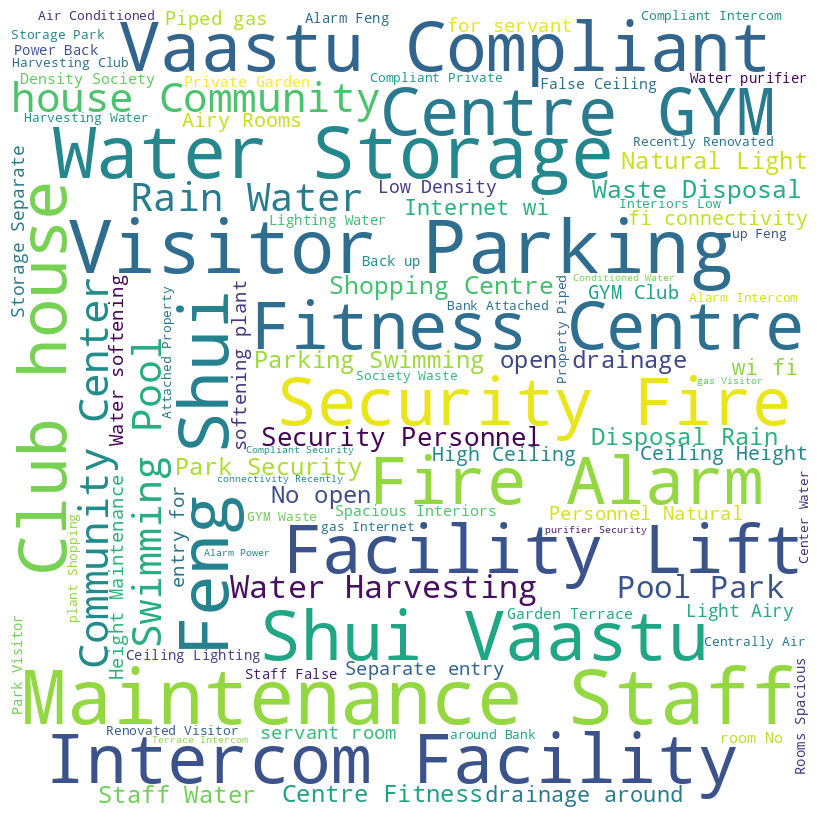

In [30]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()

In [31]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [32]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [33]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [34]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


<ipython-input-35-dc32b660127e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-35-dc32b660127e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

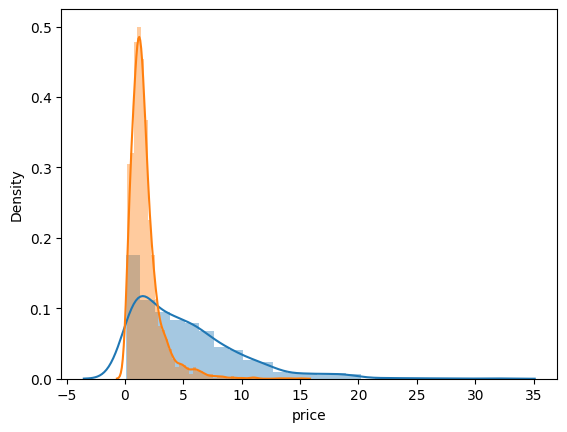

In [35]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [36]:
new_df['sector'].unique().tolist().insert(0,'overall')